In [1]:
#Hacemos lectura del Dataset, el cual se llama: fraud_detection

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
fraude=pd.read_csv("C:/Users/jforero/OneDrive - Grupo Bancolombia/fraud_detection.csv")
fraude.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


VISUALIZACIONES: Ahora, queremos hacer un analisis más detallado y para eso vamos a utilizar las relaciones entre variables claves:

In [3]:
#Relación entre variables categoricas y variable objetivo (isFraud), a continuación porcentaje de fraude por tipo de transaccion en linea

relacion_categorica = fraude.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print("Tasa de fraude por tipo de transacción en linea:")
print(relacion_categorica)

Tasa de fraude por tipo de transacción en linea:
type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


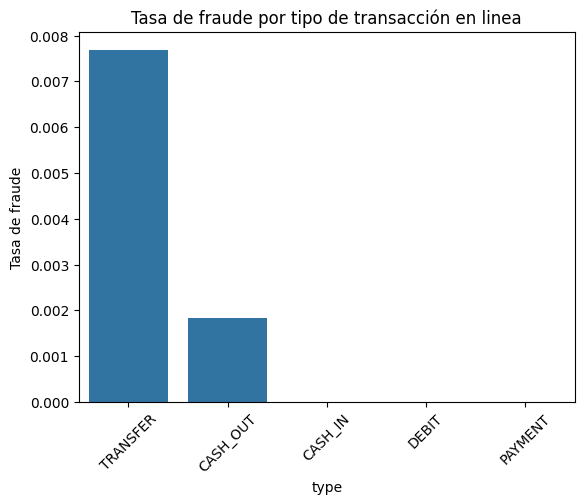

In [4]:
#Ahora sacamos la relación de forma grafica

sns.barplot(x=relacion_categorica.index, y=relacion_categorica.values)
plt.xticks(rotation=45)
plt.title('Tasa de fraude por tipo de transacción en linea')
plt.ylabel('Tasa de fraude')
plt.show()

Ahora, veamos la relación entre las varibales numericas y la variable objetivo:

In [5]:
#Promedio de variables numéricas por clase de fraude
print(fraude.groupby('isFraud')[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest' , 'newbalanceDest']].mean())

               amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
isFraud                                                                
0        1.781970e+05   8.328287e+05   855970.228109    1.101421e+06   
1        1.467967e+06   1.649668e+06   192392.631836    5.442496e+05   

         newbalanceDest  
isFraud                  
0          1.224926e+06  
1          1.279708e+06  


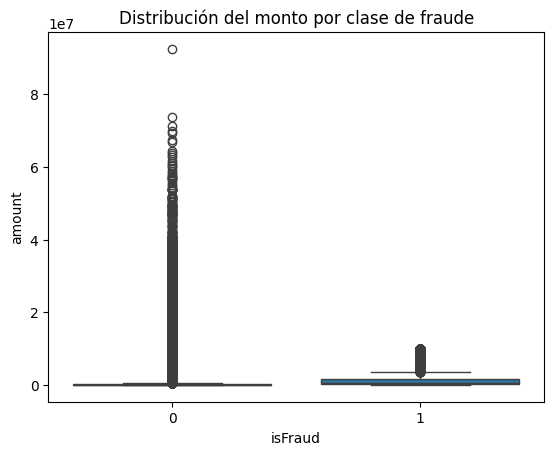

In [6]:
#Ahora veamos dicha matriz en grafico:

sns.boxplot(x='isFraud', y='amount', data=fraude)
plt.title('Distribución del monto por clase de fraude')
plt.show()

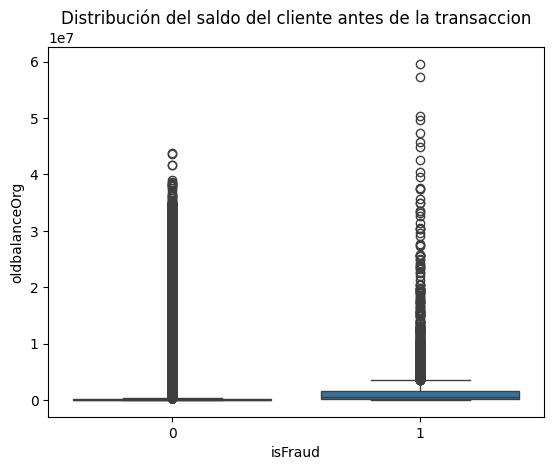

In [7]:
#Ahora veamos dicha matriz en grafico (saldo del cliente antes de la transaccion)

sns.boxplot(x='isFraud', y='oldbalanceOrg', data=fraude)
plt.title('Distribución del saldo del cliente antes de la transaccion')
plt.show()

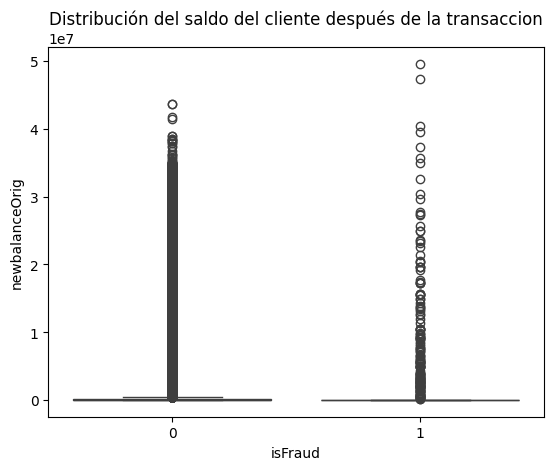

In [8]:
#Ahora veamos dicha matriz en grafico (saldo del cliente después de la transaccion)

sns.boxplot(x='isFraud', y='newbalanceOrig', data=fraude)
plt.title('Distribución del saldo del cliente después de la transaccion')
plt.show()

In [9]:
correlacion = fraude.corr(numeric_only=True) 
print(correlacion['isFraud'].sort_values(ascending=False))  # Ver qué variables se correlacionan con fraude

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


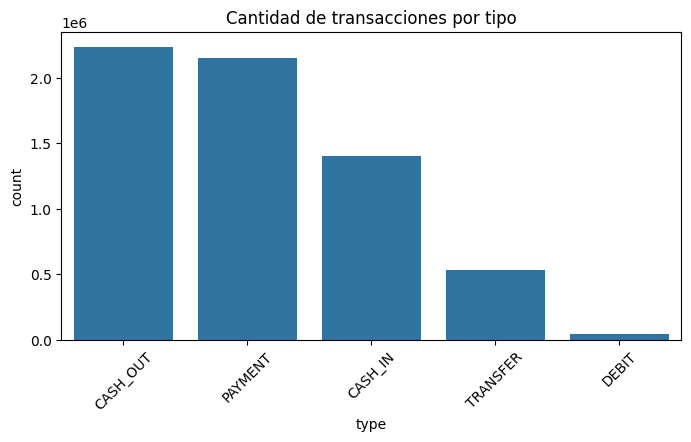

In [10]:
#Grafico de barras de las variables categoricas

plt.figure(figsize=(8, 4))
sns.countplot(data=fraude, x='type', order=fraude['type'].value_counts().index)
plt.title('Cantidad de transacciones por tipo')
plt.xticks(rotation=45)
plt.show()

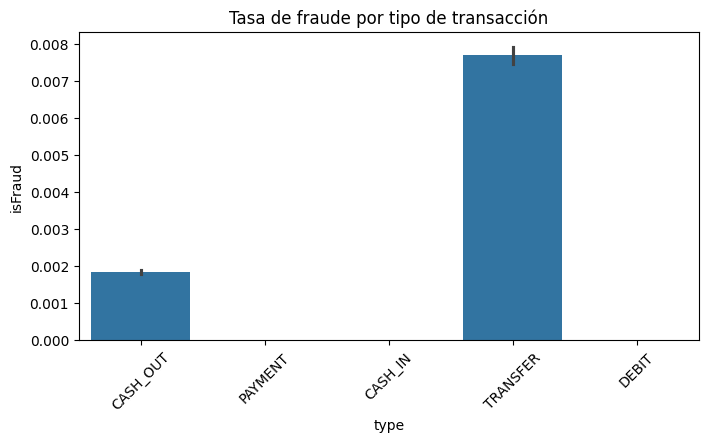

In [11]:
#Tasa de fraude por categoria

plt.figure(figsize=(8, 4))
sns.barplot(x='type', y='isFraud', data=fraude, estimator='mean', order=fraude['type'].value_counts().index)
plt.title('Tasa de fraude por tipo de transacción')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Grafico de histograma con la libreria de plotly con la intención de identificar otros patrones en los datos

fig = px.histogram(fraude, x='type', color='isFraud',
                   barmode='group', title='Transacciones por tipo y clase de fraude',
                   category_orders={'type': fraude['type'].value_counts().index})
fig.show()

In [ ]:
#Boxplot interactivo del monto vs el fraude

fig = px.box(fraude, x='isFraud', y='amount', color='isFraud',
             title='Distribución del monto por clase de fraude')
fig.show()

In [ ]:
fig = px.scatter(fraude.sample(10000), x='amount', y='newbalanceOrig', color='isFraud',
                 title='Relación entre monto y saldo (muestra de 10K puntos)')
fig.show()

In [ ]:
# Matriz de correlación
corr = fraude.corr(numeric_only=True).round(2)

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.values,
    colorscale='Viridis'
)
fig.update_layout(title='Matriz de correlación interactiva')
fig.show()